In [1]:
%load_ext autoreload
%autoreload 2
%cd "~/deepshape/deepshape"

/home/jorgen/deepshape/deepshape


In [2]:
import time
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8.3, 5.6)
plt.rcParams["font.size"] = 16
plt.rcParams["xtick.labelsize"] = 16
plt.rcParams["ytick.labelsize"] = 16

In [3]:
from curves import *
from layers import *
from palais_layer import *
from visual import *
from networks import *

In [4]:
savepath = "/home/jorgen/masters-thesis-shape-analysis/chapter04/figures/deep/same-shape/"

g = Diffeomorphism(
    lambda x: (0.5 * torch.log(20*x+1) / torch.log(21*torch.ones(1)) 
    + 0.25 * (1 + torch.tanh(20*(x-0.5)) / torch.tanh(21*torch.ones(1))))
)

c1 = Curve((
    lambda x: torch.cos(2*pi*x),
    lambda x: torch.sin(4*pi*x)
))

c2 = c1.compose(g)


# Take Qmaps
q, r = Qmap(c2), Qmap(c1)

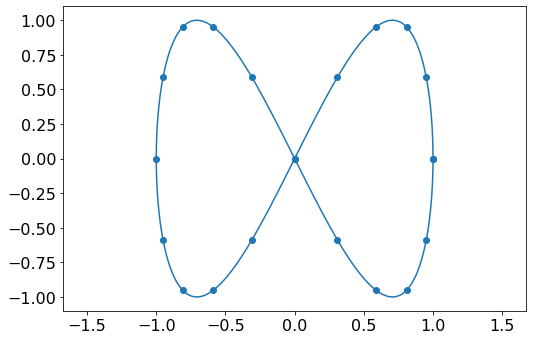

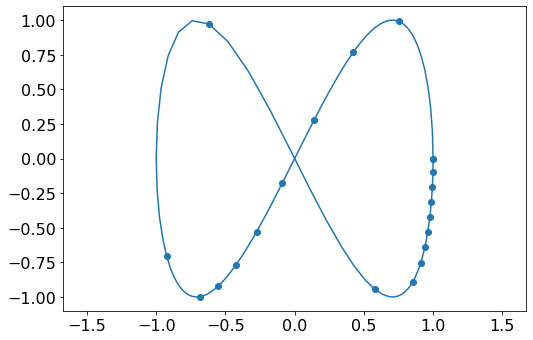

In [5]:
plt.figure(figsize=(8.3, 5.6))
plot_curve(c1, dotpoints=21, ax=plt.gca())
plt.axis("equal")

plt.savefig(savepath + "curve.pdf")

plt.figure(figsize=(8.3, 5.6))
plot_curve(c2, dotpoints=21, ax=plt.gca())
plt.axis("equal")

plt.savefig(savepath + "curve_reparam.pdf")

plt.show()

In [6]:
# Build network of L layers with N_l basis functions per layer
RN = ReparametrizationNetwork1D(5, 5, init_scale=0.)# , layer_type=PalaisLayer1D)

# Choose and configure optimizer.
optimizer = optim.LBFGS(RN.parameters(), lr=1e0, max_iter=200, line_search_fn='strong_wolfe')
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=2, threshold=0.,
    threshold_mode='rel', cooldown=10, min_lr=1e-6, eps=1e-08,
    verbose=True)

# scheduler=None
error = train_bfgs(q, r, RN, optimizer, scheduler=scheduler, iterations=1, log_every=1)

# Create Plotting Data to verify reparametrizations
x = torch.linspace(0, 1, 1024).unsqueeze(-1)
z, y = RN(x)
z, y = z.detach(), y.detach()
Q, R = q(x), RN.reparametrized(r, x)
R = R.detach()

[Iter     1] loss: 9.44122
[Iter     2] loss: 14.15428
[Iter     3] loss: 10.02884
[Iter     4] loss: 7.39736
[Iter     5] loss: 6.58266
[Iter     6] loss: 6.02952
[Iter     7] loss: 3.76135
[Iter     8] loss: 6.58939
[Iter     9] loss: 3.34244
[Iter    10] loss: 2.65661
[Iter    11] loss: 2.54692
[Iter    12] loss: 0.99344
[Iter    13] loss: 0.47916
[Iter    14] loss: 0.46712
[Iter    15] loss: 0.12352
[Iter    16] loss: 0.08056
[Iter    17] loss: 0.06959
[Iter    18] loss: 0.06808
[Iter    19] loss: 0.06690
[Iter    20] loss: 0.06335
[Iter    21] loss: 0.05811
[Iter    22] loss: 0.05207
[Iter    23] loss: 0.04890
[Iter    24] loss: 0.04789
[Iter    25] loss: 0.04756
[Iter    26] loss: 0.04638
[Iter    27] loss: 0.04455
[Iter    28] loss: 0.04341
[Iter    29] loss: 0.04285
[Iter    30] loss: 0.04256
[Iter    31] loss: 0.04191
[Iter    32] loss: 0.03771
[Iter    33] loss: 0.03590
[Iter    34] loss: 0.03399
[Iter    35] loss: 0.03317
[Iter    36] loss: 0.03110
[Iter    37] loss: 0.02709

In [24]:
1.75008026e-04 / 9.44121552e+00 * 100

0.0018536598982331037

In [27]:
(g(x) - z).norm(float(np.inf))

tensor(0.0006)

In [25]:
print("Errors, 1-norm, 2-norm and inf-norm")
print((g(x) - z).norm(1)/ 1024.)
print((g(x) - z).norm(2)/ np.sqrt(1024))
print((g(x) - z).norm(float(np.inf)))

Errors, 1-norm, 2-norm and inf-norm
tensor(0.0001)
tensor(0.0001)
tensor(0.0006)


In [21]:
error

array([9.44121552e+00, 9.44121552e+00, 7.24878550e+00, 7.17898321e+00,
       6.93941021e+00, 6.85333920e+00, 6.19688129e+00, 5.77908421e+00,
       3.60666585e+00, 2.02335334e+00, 1.83784735e+00, 1.10005951e+00,
       1.08284402e+00, 1.01700878e+00, 8.75241458e-01, 7.50147164e-01,
       6.45133018e-01, 5.55670023e-01, 1.88302636e-01, 1.84044123e-01,
       1.66048571e-01, 1.43239960e-01, 4.14621420e-02, 3.55959348e-02,
       3.18853147e-02, 1.45253073e-02, 1.38394590e-02, 1.01988688e-02,
       9.60365124e-03, 7.76248379e-03, 7.37454509e-03, 6.01558806e-03,
       5.76760340e-03, 4.87999758e-03, 4.68753977e-03, 3.65720736e-03,
       3.59313609e-03, 3.42759839e-03, 3.33927828e-03, 3.12551018e-03,
       3.05988267e-03, 2.84816627e-03, 2.81230663e-03, 2.68845400e-03,
       2.67024501e-03, 2.63689132e-03, 2.61152070e-03, 2.51530064e-03,
       2.48544989e-03, 2.37579737e-03, 2.33779615e-03, 2.19357084e-03,
       2.14239093e-03, 1.95483910e-03, 1.89259509e-03, 1.70180842e-03,
      

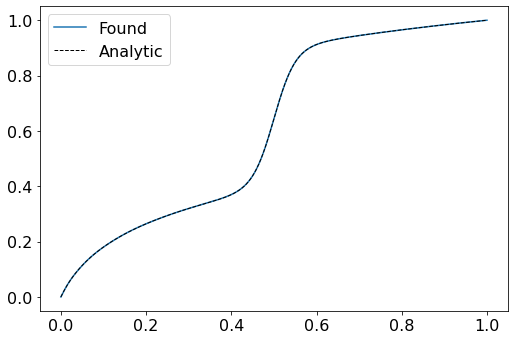

In [7]:
# Create Plotting Data to verify reparametrizations
x = torch.linspace(0, 1, 1024).unsqueeze(-1)
z, y = RN(x)
z, y = z.detach(), y.detach()
Q, R = q(x), RN.reparametrized(r, x)
R = R.detach()

# Plot Diffeomorphism...
plt.figure(figsize=(8.4, 5.6))
plt.plot(x, z, label="Found", lw=1.5)
plt.plot(x, g(x), label="Analytic", ls="--", c="black", lw=1)


# plt.title("Comparison of True vs. Found Reparametrization")
plt.legend()
plt.savefig(savepath + "reparametrized_diffeomorphisms.pdf", bbox_inches="tight")
plt.show()

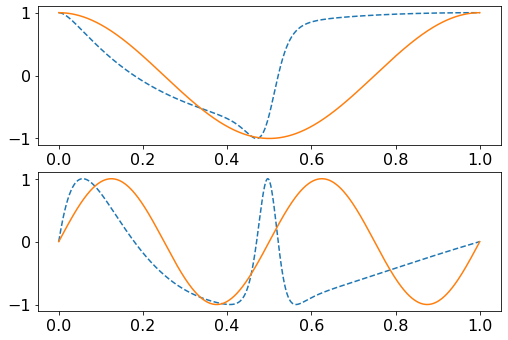

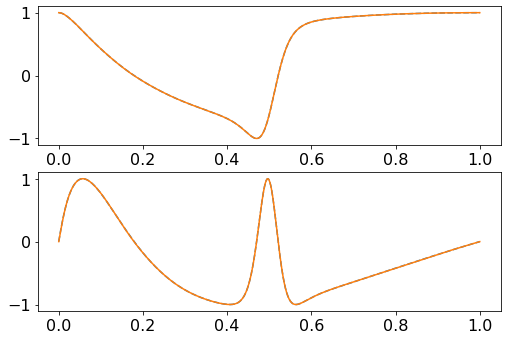

In [8]:
# Create Plotting Data to verify reparametrizations
x = torch.linspace(0, 1, 1024).unsqueeze(-1)
C1, C2, C3 = c1(x), c2(x), c1(z)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8.3, 5.6))
ax1.plot(x, C2[:, 0], ls="dashed")
ax1.plot(x, C1[:, 0])

ax2.plot(x, C2[:, 1], ls="dashed")
ax2.plot(x, C1[:, 1])

plt.savefig(savepath + "coordinates-before.pdf", bbox_inches="tight")
plt.show()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8.3, 5.6))
ax1.plot(x, C2[:, 0], ls="dashed")
ax1.plot(x, C3[:, 0])

ax2.plot(x, C2[:, 1], ls="dashed")
ax2.plot(x, C3[:, 1])

plt.savefig(savepath + "coordinates-after.pdf", bbox_inches="tight")
plt.show()

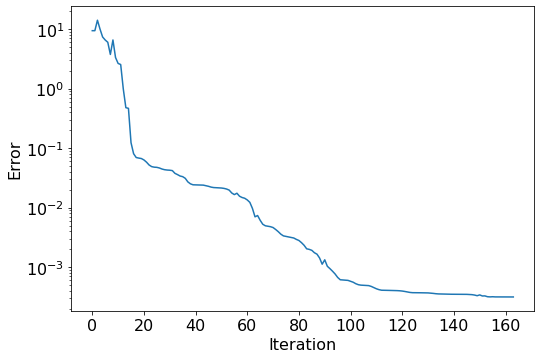

In [9]:
plt.figure()
plt.semilogy(error)
plt.ylabel("Error", fontsize=16)
plt.xlabel("Iteration", fontsize=16)
plt.savefig(savepath + "reparametrization_error_log.pdf", bbox_inches="tight")

In [5]:
error_vs_num_layers = []
bfgs_iter = 200

for l in range(1, 11):
    # Build network of L layers with N_l basis functions per layer
    RN = ReparametrizationNetwork1D(l, 5, init_scale=0.)#, layer_type=PalaisLayer1D)
    
    optimizer = optim.LBFGS(RN.parameters(), lr=1e-1, max_iter=200, line_search_fn="strong_wolfe")
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=1, threshold=0.,
        threshold_mode='rel', cooldown=10, min_lr=1e-6, eps=1e-08,
        verbose=True)
    
    error = train_bfgs(q, r, RN, optimizer, scheduler=scheduler, iterations=1, log_every=1.)
    print(error[-1])
    error_vs_num_layers.append(error[-1])
    

[Iter     1] loss: 9.44122
[Iter     2] loss: 6.80850
[Iter     3] loss: 6.72774
[Iter     4] loss: 6.28881
[Iter     5] loss: 6.24271
[Iter     6] loss: 5.93644
[Iter     7] loss: 5.83139
[Iter     8] loss: 5.53282
[Iter     9] loss: 5.43837
[Iter    10] loss: 5.20244
[Iter    11] loss: 5.10605
[Iter    12] loss: 4.72087
[Iter    13] loss: 4.33517
[Iter    14] loss: 4.18336
[Iter    15] loss: 3.73606
[Iter    16] loss: 3.68514
[Iter    17] loss: 3.68467
[Iter    18] loss: 3.68471
Epoch    19: reducing learning rate of group 0 to 5.0000e-02.
[Iter    19] loss: 3.68470
[Iter    20] loss: 3.68467
[Iter    21] loss: 3.68468
[Iter    22] loss: 3.64568
[Iter    23] loss: 3.64536
[Iter    24] loss: 3.64535
[Iter    25] loss: 3.64533
[Iter    26] loss: 3.64533
[Iter    27] loss: 3.61548
[Iter    28] loss: 3.61521
[Iter    29] loss: 3.61529
[Iter    30] loss: 3.61520
[Iter    31] loss: 3.61518
[Iter    32] loss: 3.61517
[Iter    33] loss: 3.61511
[Iter    34] loss: 3.61514
Epoch    35: reducin

[Iter   174] loss: 0.02052
[Iter   175] loss: 0.02052
[Iter   176] loss: 0.02052
[Iter   177] loss: 0.02052
[Iter   178] loss: 0.02052
[Iter   179] loss: 0.02052
Epoch   180: reducing learning rate of group 0 to 5.0000e-02.
[Iter   180] loss: 0.02052
[Iter   181] loss: 0.02052
[Iter   182] loss: 0.02052
[Iter   183] loss: 0.02052
[Iter   184] loss: 0.02052
[Iter   185] loss: 0.02052
[Iter   186] loss: 0.02052
[Iter   187] loss: 0.02052
[Iter   188] loss: 0.02052
[Iter   189] loss: 0.02052
[Iter   190] loss: 0.02052
[Iter   191] loss: 0.02052
Epoch   192: reducing learning rate of group 0 to 2.5000e-02.
[Iter   192] loss: 0.02052
[Iter   193] loss: 0.02052
[Iter   194] loss: 0.02052
[Iter   195] loss: 0.02052
[Iter   196] loss: 0.02052
[Iter   197] loss: 0.02052
[Iter   198] loss: 0.02052
[Iter   199] loss: 0.02052
[Iter   200] loss: 0.02052
[Iter   201] loss: 0.02052
[Iter   202] loss: 0.02052

Finished training in 0.74547s
0.020516667515039444
[Iter     1] loss: 9.44122
[Iter     2] l

[Iter   177] loss: 0.00124
[Iter   178] loss: 0.00122
[Iter   179] loss: 0.00120
[Iter   180] loss: 0.00118
[Iter   181] loss: 0.00116
[Iter   182] loss: 0.00115
[Iter   183] loss: 0.00113
[Iter   184] loss: 0.00112
[Iter   185] loss: 0.00111
[Iter   186] loss: 0.00108
[Iter   187] loss: 0.00107
[Iter   188] loss: 0.00105
[Iter   189] loss: 0.00105
[Iter   190] loss: 0.00104
[Iter   191] loss: 0.00103
[Iter   192] loss: 0.00102
[Iter   193] loss: 0.00101
[Iter   194] loss: 0.00100
[Iter   195] loss: 0.00096
[Iter   196] loss: 0.00096
[Iter   197] loss: 0.00093
[Iter   198] loss: 0.00093
[Iter   199] loss: 0.00092
[Iter   200] loss: 0.00091
[Iter   201] loss: 0.00091
[Iter   202] loss: 0.00090
[Iter   203] loss: 0.00090
[Iter   204] loss: 0.00089
[Iter   205] loss: 0.00087
[Iter   206] loss: 0.00087
[Iter   207] loss: 0.00086
[Iter   208] loss: 0.00086
[Iter   209] loss: 0.00084
[Iter   210] loss: 0.00084
[Iter   211] loss: 0.00084
[Iter   212] loss: 0.00083
[Iter   213] loss: 0.00083
[

[Iter   235] loss: 0.00102
[Iter   236] loss: 0.00097
[Iter   237] loss: 0.00095
[Iter   238] loss: 0.00093
[Iter   239] loss: 0.00090
[Iter   240] loss: 0.00086
[Iter   241] loss: 0.00084
[Iter   242] loss: 0.00081
[Iter   243] loss: 0.00077
[Iter   244] loss: 0.00075
[Iter   245] loss: 0.00073
[Iter   246] loss: 0.00071
[Iter   247] loss: 0.00070
[Iter   248] loss: 0.00068
[Iter   249] loss: 0.00067
[Iter   250] loss: 0.00066

Finished training in 1.34963s
0.0006573681021109223
[Iter     1] loss: 9.44122
[Iter     2] loss: 7.44731
[Iter     3] loss: 7.35607
[Iter     4] loss: 6.62095
[Iter     5] loss: 6.22517
[Iter     6] loss: 5.84157
[Iter     7] loss: 4.67642
[Iter     8] loss: 4.39347
[Iter     9] loss: 3.13787
[Iter    10] loss: 2.82879
[Iter    11] loss: 2.74054
[Iter    12] loss: 2.09455
[Iter    13] loss: 1.81286
[Iter    14] loss: 0.81884
[Iter    15] loss: 0.74716
[Iter    16] loss: 0.38305
[Iter    17] loss: 0.35798
[Iter    18] loss: 0.19166
[Iter    19] loss: 0.16614
[I

[Iter    47] loss: 0.03900
[Iter    48] loss: 0.03875
[Iter    49] loss: 0.03769
[Iter    50] loss: 0.03756
[Iter    51] loss: 0.03704
[Iter    52] loss: 0.03683
[Iter    53] loss: 0.03599
[Iter    54] loss: 0.03557
[Iter    55] loss: 0.03353
[Iter    56] loss: 0.03295
[Iter    57] loss: 0.03087
[Iter    58] loss: 0.03020
[Iter    59] loss: 0.02780
[Iter    60] loss: 0.02745
[Iter    61] loss: 0.02570
[Iter    62] loss: 0.02491
[Iter    63] loss: 0.02424
[Iter    64] loss: 0.02367
[Iter    65] loss: 0.02317
[Iter    66] loss: 0.02157
[Iter    67] loss: 0.02143
[Iter    68] loss: 0.02113
[Iter    69] loss: 0.02102
[Iter    70] loss: 0.02063
[Iter    71] loss: 0.02054
[Iter    72] loss: 0.02019
[Iter    73] loss: 0.02005
[Iter    74] loss: 0.01949
[Iter    75] loss: 0.01922
[Iter    76] loss: 0.01745
[Iter    77] loss: 0.01704
[Iter    78] loss: 0.01538
[Iter    79] loss: 0.01430
[Iter    80] loss: 0.01199
[Iter    81] loss: 0.01166
[Iter    82] loss: 0.01145
[Iter    83] loss: 0.01077
[

[Iter   102] loss: 0.00685
[Iter   103] loss: 0.00677
[Iter   104] loss: 0.00648
[Iter   105] loss: 0.00644
[Iter   106] loss: 0.00634
[Iter   107] loss: 0.00631
[Iter   108] loss: 0.00627
[Iter   109] loss: 0.00623
[Iter   110] loss: 0.00616
[Iter   111] loss: 0.00611
[Iter   112] loss: 0.00593
[Iter   113] loss: 0.00588
[Iter   114] loss: 0.00561
[Iter   115] loss: 0.00555
[Iter   116] loss: 0.00544
[Iter   117] loss: 0.00531
[Iter   118] loss: 0.00478
[Iter   119] loss: 0.00474
[Iter   120] loss: 0.00461
[Iter   121] loss: 0.00456
[Iter   122] loss: 0.00447
[Iter   123] loss: 0.00439
[Iter   124] loss: 0.00425
[Iter   125] loss: 0.00418
[Iter   126] loss: 0.00395
[Iter   127] loss: 0.00391
[Iter   128] loss: 0.00377
[Iter   129] loss: 0.00375
[Iter   130] loss: 0.00373
[Iter   131] loss: 0.00370
[Iter   132] loss: 0.00362
[Iter   133] loss: 0.00359
[Iter   134] loss: 0.00355
[Iter   135] loss: 0.00351
[Iter   136] loss: 0.00337
[Iter   137] loss: 0.00333
[Iter   138] loss: 0.00319
[

[Iter   159] loss: 0.00155
[Iter   160] loss: 0.00149
[Iter   161] loss: 0.00147
[Iter   162] loss: 0.00142
[Iter   163] loss: 0.00140
[Iter   164] loss: 0.00139
[Iter   165] loss: 0.00137
[Iter   166] loss: 0.00136
[Iter   167] loss: 0.00134
[Iter   168] loss: 0.00133
[Iter   169] loss: 0.00132
[Iter   170] loss: 0.00131
[Iter   171] loss: 0.00129
[Iter   172] loss: 0.00128
[Iter   173] loss: 0.00123
[Iter   174] loss: 0.00122
[Iter   175] loss: 0.00121
[Iter   176] loss: 0.00119
[Iter   177] loss: 0.00116
[Iter   178] loss: 0.00114
[Iter   179] loss: 0.00108
[Iter   180] loss: 0.00107
[Iter   181] loss: 0.00105
[Iter   182] loss: 0.00104
[Iter   183] loss: 0.00102
[Iter   184] loss: 0.00101
[Iter   185] loss: 0.00095
[Iter   186] loss: 0.00094
[Iter   187] loss: 0.00092
[Iter   188] loss: 0.00092
[Iter   189] loss: 0.00091
[Iter   190] loss: 0.00090
[Iter   191] loss: 0.00089
[Iter   192] loss: 0.00087
[Iter   193] loss: 0.00086
[Iter   194] loss: 0.00084
[Iter   195] loss: 0.00083
[

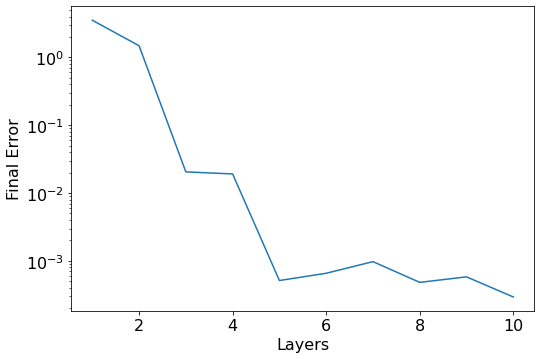

In [6]:
plt.figure(figsize=(8.3, 5.6))
plt.semilogy(range(1, 11), error_vs_num_layers)
plt.ylabel("Final Error", fontsize=16)
plt.xlabel("Layers", fontsize=16)
plt.savefig(savepath + "error-vs-layers-fourier.pdf", bbox_inches="tight")
plt.show()

In [15]:
errors_vs_num_basis = []
for l in range(1, 11):
    # Build network of L layers with N_l basis functions per layer
    RN = ReparametrizationNetwork1D(5, l, init_scale=0.)#, layer_type=PalaisLayer1D)
    
    optimizer = optim.LBFGS(RN.parameters(), lr=0.9, max_iter=bfgs_iter, max_eval=bfgs_iter, line_search_fn="strong_wolfe")
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=1, threshold=0.,
                                                 threshold_mode='rel', cooldown=10, min_lr=1e-3, eps=1e-08, verbose=True)
    
    error = train_bfgs(q, r, RN, optimizer, scheduler=scheduler, iterations=1, log_every=1.)
    print(error[-1])
    errors_vs_num_basis.append(error[-1])
    

[Iter     1] loss: 9.44122
[Iter     2] loss: 15.33295
[Iter     3] loss: 8.75823
[Iter     4] loss: 7.48982
[Iter     5] loss: 7.46797
[Iter     6] loss: 7.46796
[Iter     7] loss: 7.46795
[Iter     8] loss: 7.46794
[Iter     9] loss: 7.46794
Epoch    10: reducing learning rate of group 0 to 4.5000e-01.
[Iter    10] loss: 7.46794
[Iter    11] loss: 7.46793
[Iter    12] loss: 7.46798
[Iter    13] loss: 7.46793
[Iter    14] loss: 7.46795
[Iter    15] loss: 7.46795
[Iter    16] loss: 7.46798
[Iter    17] loss: 7.46793

Finished training in 0.08634s
7.467928886413574
[Iter     1] loss: 9.44122
[Iter     2] loss: 14.23928
[Iter     3] loss: 9.09374
[Iter     4] loss: 6.81623
[Iter     5] loss: 5.97227
[Iter     6] loss: 6.04623
[Iter     7] loss: 5.95688
[Iter     8] loss: 5.94706
[Iter     9] loss: 5.88036
[Iter    10] loss: 5.83073
[Iter    11] loss: 5.74472
[Iter    12] loss: 5.63863
[Iter    13] loss: 8.76289
[Iter    14] loss: 5.46704
[Iter    15] loss: 5.11386
[Iter    16] loss: 5.06

[Iter    36] loss: 0.03865
[Iter    37] loss: 0.03864
[Iter    38] loss: 0.03862
[Iter    39] loss: 0.03857
[Iter    40] loss: 0.03847
[Iter    41] loss: 0.03825
[Iter    42] loss: 0.03795
[Iter    43] loss: 0.03777
[Iter    44] loss: 0.03770
[Iter    45] loss: 0.03766
[Iter    46] loss: 0.03761
[Iter    47] loss: 0.03748
[Iter    48] loss: 0.03737
[Iter    49] loss: 0.03724
[Iter    50] loss: 0.03711
[Iter    51] loss: 0.03698
[Iter    52] loss: 0.03688
[Iter    53] loss: 0.03677
[Iter    54] loss: 0.03787
[Iter    55] loss: 0.03669
[Iter    56] loss: 0.03646
[Iter    57] loss: 0.03702
[Iter    58] loss: 0.03595
[Iter    59] loss: 0.03566
[Iter    60] loss: 0.03521
[Iter    61] loss: 0.03663
[Iter    62] loss: 0.03464
[Iter    63] loss: 0.03408
[Iter    64] loss: 0.03319
[Iter    65] loss: 0.03505
[Iter    66] loss: 0.03285
[Iter    67] loss: 0.03222
[Iter    68] loss: 0.03216
[Iter    69] loss: 0.03203
[Iter    70] loss: 0.03200
[Iter    71] loss: 0.03169
[Iter    72] loss: 0.03078
[

[Iter   135] loss: 0.00031
[Iter   136] loss: 0.00031
[Iter   137] loss: 0.00031
[Iter   138] loss: 0.00031
Epoch   139: reducing learning rate of group 0 to 2.2500e-01.
[Iter   139] loss: 0.00031
[Iter   140] loss: 0.00031
[Iter   141] loss: 0.00031
[Iter   142] loss: 0.00031

Finished training in 0.75539s
0.00031293233041651547
[Iter     1] loss: 9.44122
[Iter     2] loss: 13.93478
Epoch     3: reducing learning rate of group 0 to 4.5000e-01.
[Iter     3] loss: 9.52355
[Iter     4] loss: 7.29094
[Iter     5] loss: 6.30017
[Iter     6] loss: 8.72998
[Iter     7] loss: 5.08199
[Iter     8] loss: 4.56296
[Iter     9] loss: 6.93681
[Iter    10] loss: 3.95247
[Iter    11] loss: 3.42568
[Iter    12] loss: 2.39536
[Iter    13] loss: 3.61836
[Iter    14] loss: 0.65433
[Iter    15] loss: 0.51940
[Iter    16] loss: 0.30219
[Iter    17] loss: 0.23546
[Iter    18] loss: 0.11190
[Iter    19] loss: 0.07475
[Iter    20] loss: 0.05907
[Iter    21] loss: 0.05747
[Iter    22] loss: 0.05552
[Iter    23

[Iter   137] loss: 0.00013
[Iter   138] loss: 0.00013
[Iter   139] loss: 0.00013
[Iter   140] loss: 0.00012
[Iter   141] loss: 0.00012
[Iter   142] loss: 0.00012
[Iter   143] loss: 0.00012
[Iter   144] loss: 0.00011
[Iter   145] loss: 0.00011
[Iter   146] loss: 0.00011
[Iter   147] loss: 0.00011
[Iter   148] loss: 0.00010
[Iter   149] loss: 0.00010
[Iter   150] loss: 0.00010
[Iter   151] loss: 0.00010
[Iter   152] loss: 0.00010
[Iter   153] loss: 0.00010
[Iter   154] loss: 0.00010
[Iter   155] loss: 0.00010
[Iter   156] loss: 0.00010
Epoch   157: reducing learning rate of group 0 to 1.1250e-01.
[Iter   157] loss: 0.00010
[Iter   158] loss: 0.00010
[Iter   159] loss: 0.00010

Finished training in 0.97066s
9.879336721496657e-05
[Iter     1] loss: 9.44122
[Iter     2] loss: 10.73737
Epoch     3: reducing learning rate of group 0 to 4.5000e-01.
[Iter     3] loss: 9.45101
[Iter     4] loss: 7.20206
[Iter     5] loss: 5.91772
[Iter     6] loss: 10.72794
[Iter     7] loss: 4.93011
[Iter     8

[Iter    35] loss: 2.79575
[Iter    36] loss: 2.79583
[Iter    37] loss: 2.79577
[Iter    38] loss: 2.79580
[Iter    39] loss: 2.79574
[Iter    40] loss: 2.79571
[Iter    41] loss: 2.79573
[Iter    42] loss: 2.79571
[Iter    43] loss: 2.79571
Epoch    44: reducing learning rate of group 0 to 5.6250e-02.
[Iter    44] loss: 5.99147
[Iter    45] loss: 3.65098
[Iter    46] loss: 2.80806
[Iter    47] loss: 2.79604
[Iter    48] loss: 2.79578
[Iter    49] loss: 2.79572
[Iter    50] loss: 2.79572
[Iter    51] loss: 2.79575
[Iter    52] loss: 2.79575
[Iter    53] loss: 2.79572
[Iter    54] loss: 2.79571

Finished training in 0.25760s
2.795712471008301


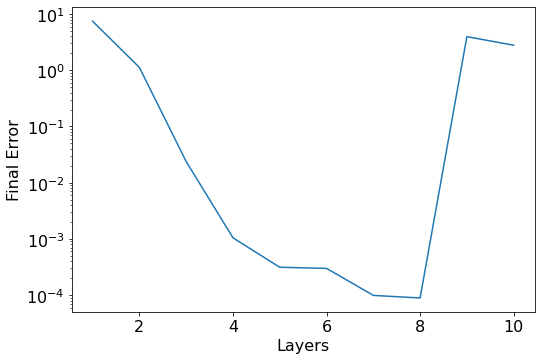

In [16]:
plt.figure(figsize=(8.3, 5.6))
plt.semilogy(range(1, 11), errors_vs_num_basis)
plt.ylabel("Final Error", fontsize=16)
plt.xlabel("Layers", fontsize=16)
plt.savefig(savepath + "error-vs-functions-fourier.pdf", bbox_inches="tight")
plt.show()

In [9]:
palais_errorsvs_num_layers = []
for l in range(1, 11):
    # Build network of L layers with N_l basis functions per layer
    RN = ReparametrizationNetwork1D(l, 5, init_scale=0., layer_type=PalaisLayer1D)
    
    optimizer = optim.LBFGS(RN.parameters(), lr=0.9, max_iter=bfgs_iter, max_eval=bfgs_iter, line_search_fn="strong_wolfe")
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=1, threshold=0.,
                                                 threshold_mode='rel', cooldown=10, min_lr=1e-3, eps=1e-08, verbose=True)
    
    error = train_bfgs(q, r, RN, optimizer, scheduler=scheduler, iterations=1, log_every=1.)
    print(error[-1])
    palais_errorsvs_num_layers.append(error[-1])
    

[Iter     1] loss: 9.44122
[Iter     2] loss: 10.97572
[Iter     3] loss: 8.36758
[Iter     4] loss: 6.78376
[Iter     5] loss: 6.19766
[Iter     6] loss: 5.30804
[Iter     7] loss: 4.27432
[Iter     8] loss: 3.71341
[Iter     9] loss: 3.03906
[Iter    10] loss: 4.70394
[Iter    11] loss: 2.88247
[Iter    12] loss: 4.37282
[Iter    13] loss: 2.82846
[Iter    14] loss: 2.86124
[Iter    15] loss: 2.82050
[Iter    16] loss: 2.81880
[Iter    17] loss: 2.81926
[Iter    18] loss: 2.81876
[Iter    19] loss: 2.81879
Epoch    20: reducing learning rate of group 0 to 4.5000e-01.
[Iter    20] loss: 2.81878
[Iter    21] loss: 2.81877
[Iter    22] loss: 2.81878
[Iter    23] loss: 2.81879
[Iter    24] loss: 2.81876
[Iter    25] loss: 2.81876
[Iter    26] loss: 4.78255
[Iter    27] loss: 2.87592
[Iter    28] loss: 2.81980
[Iter    29] loss: 2.81884
[Iter    30] loss: 2.81879
[Iter    31] loss: 2.81878
Epoch    32: reducing learning rate of group 0 to 2.2500e-01.
[Iter    32] loss: 2.81877
[Iter    33

[Iter   138] loss: 0.00175
[Iter   139] loss: 0.00175
[Iter   140] loss: 0.00174
[Iter   141] loss: 0.00174
[Iter   142] loss: 0.00174
[Iter   143] loss: 0.00174
[Iter   144] loss: 0.00174
[Iter   145] loss: 0.00173
[Iter   146] loss: 0.00172
[Iter   147] loss: 0.00170
[Iter   148] loss: 0.00169
[Iter   149] loss: 0.00168
[Iter   150] loss: 0.00167
[Iter   151] loss: 0.00165
[Iter   152] loss: 0.00164
[Iter   153] loss: 0.00162
[Iter   154] loss: 0.00162
[Iter   155] loss: 0.00161
[Iter   156] loss: 0.00161
[Iter   157] loss: 0.00161
[Iter   158] loss: 0.00161
[Iter   159] loss: 0.00161
[Iter   160] loss: 0.00161
[Iter   161] loss: 0.00160
[Iter   162] loss: 0.00160
[Iter   163] loss: 0.00160
[Iter   164] loss: 0.00160
[Iter   165] loss: 0.00160
[Iter   166] loss: 0.00160
[Iter   167] loss: 0.00160
[Iter   168] loss: 0.00160
[Iter   169] loss: 0.00159
[Iter   170] loss: 0.00159
[Iter   171] loss: 0.00159
[Iter   172] loss: 0.00159
[Iter   173] loss: 0.00159
[Iter   174] loss: 0.00159
[

[Iter    56] loss: 0.00485
[Iter    57] loss: 0.00468
[Iter    58] loss: 0.00464
[Iter    59] loss: 0.00459
[Iter    60] loss: 0.00449
[Iter    61] loss: 0.00437
[Iter    62] loss: 0.00419
[Iter    63] loss: 0.00397
[Iter    64] loss: 0.00378
[Iter    65] loss: 0.00360
[Iter    66] loss: 0.00332
[Iter    67] loss: 0.00281
[Iter    68] loss: 0.00244
[Iter    69] loss: 0.00237
[Iter    70] loss: 0.00234
[Iter    71] loss: 0.00233
[Iter    72] loss: 0.00232
[Iter    73] loss: 0.00232
[Iter    74] loss: 0.00229
[Iter    75] loss: 0.00220
[Iter    76] loss: 0.00199
[Iter    77] loss: 0.00194
[Iter    78] loss: 0.00190
[Iter    79] loss: 0.00189
[Iter    80] loss: 0.00189
[Iter    81] loss: 0.00188
[Iter    82] loss: 0.00188
[Iter    83] loss: 0.00188
[Iter    84] loss: 0.00188
[Iter    85] loss: 0.00187
[Iter    86] loss: 0.00186
[Iter    87] loss: 0.00183
[Iter    88] loss: 0.00177
[Iter    89] loss: 0.00170
[Iter    90] loss: 0.00162
[Iter    91] loss: 0.00157
[Iter    92] loss: 0.00152
[

[Iter   176] loss: 0.00031
[Iter   177] loss: 0.00031
[Iter   178] loss: 0.00031
Epoch   179: reducing learning rate of group 0 to 4.5000e-01.
[Iter   179] loss: 0.00031
[Iter   180] loss: 0.00031
[Iter   181] loss: 0.00031

Finished training in 1.16702s
0.0003104561474174261
[Iter     1] loss: 9.44122
[Iter     2] loss: 13.39980
[Iter     3] loss: 7.74301
[Iter     4] loss: 7.00793
[Iter     5] loss: 3.09019
[Iter     6] loss: 15.35285
[Iter     7] loss: 2.78476
[Iter     8] loss: 2.52201
[Iter     9] loss: 2.10492
[Iter    10] loss: 1.79368
[Iter    11] loss: 0.92471
[Iter    12] loss: 0.23979
[Iter    13] loss: 0.06188
[Iter    14] loss: 0.05944
[Iter    15] loss: 0.05910
[Iter    16] loss: 0.05775
[Iter    17] loss: 0.05546
[Iter    18] loss: 0.05211
[Iter    19] loss: 0.04829
[Iter    20] loss: 0.04779
[Iter    21] loss: 0.04776
[Iter    22] loss: 0.04773
[Iter    23] loss: 0.04753
[Iter    24] loss: 0.04686
[Iter    25] loss: 0.04432
[Iter    26] loss: 0.04215
[Iter    27] loss: 

[Iter   159] loss: 0.00038
[Iter   160] loss: 0.00038
[Iter   161] loss: 0.00038
[Iter   162] loss: 0.00038
[Iter   163] loss: 0.00038
[Iter   164] loss: 0.00038
[Iter   165] loss: 0.00038
[Iter   166] loss: 0.00037
[Iter   167] loss: 0.00037
[Iter   168] loss: 0.00036
[Iter   169] loss: 0.00036
[Iter   170] loss: 0.00035
[Iter   171] loss: 0.00035
[Iter   172] loss: 0.00035
[Iter   173] loss: 0.00034
[Iter   174] loss: 0.00033
[Iter   175] loss: 0.00032
[Iter   176] loss: 0.00030
[Iter   177] loss: 0.00028
[Iter   178] loss: 0.00026
[Iter   179] loss: 0.00025
[Iter   180] loss: 0.00025
[Iter   181] loss: 0.00025
[Iter   182] loss: 0.00025
[Iter   183] loss: 0.00025
[Iter   184] loss: 0.00024
[Iter   185] loss: 0.00024
[Iter   186] loss: 0.00024
[Iter   187] loss: 0.00024
[Iter   188] loss: 0.00024
[Iter   189] loss: 0.00024
[Iter   190] loss: 0.00024
[Iter   191] loss: 0.00024
[Iter   192] loss: 0.00024
[Iter   193] loss: 0.00024
[Iter   194] loss: 0.00024
[Iter   195] loss: 0.00024
[

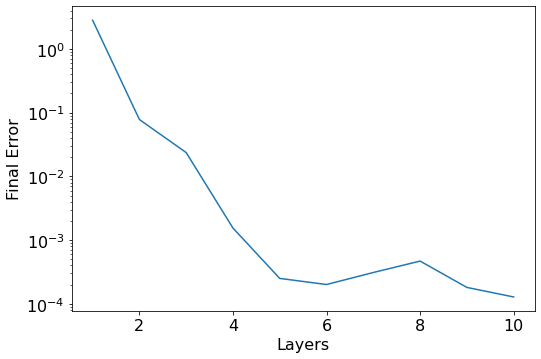

In [10]:
plt.figure(figsize=(8.3, 5.6))
plt.semilogy(range(1, 11), palais_errorsvs_num_layers)
plt.ylabel("Final Error", fontsize=16)
plt.xlabel("Layers", fontsize=16)
plt.savefig(savepath + "error-vs-layers-palais.pdf", bbox_inches="tight")
plt.show()

In [11]:
palais_errorsvs_num_basis = []
for l in range(1, 11):
    # Build network of L layers with N_l basis functions per layer
    RN = ReparametrizationNetwork1D(5, l, init_scale=0., layer_type=PalaisLayer1D)
    
    optimizer = optim.LBFGS(RN.parameters(), lr=0.9, max_iter=bfgs_iter, max_eval=bfgs_iter, line_search_fn="strong_wolfe")
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=1, threshold=0.,
                                                 threshold_mode='rel', cooldown=10, min_lr=1e-3, eps=1e-08, verbose=True)
    
    error = train_bfgs(q, r, RN, optimizer, scheduler=scheduler, iterations=1, log_every=1.)
    print(error[-1])
    palais_errorsvs_num_basis.append(error[-1])
    

[Iter     1] loss: 9.44122
[Iter     2] loss: 15.33295
[Iter     3] loss: 8.75823
[Iter     4] loss: 7.48982
[Iter     5] loss: 7.46797
[Iter     6] loss: 7.46796
[Iter     7] loss: 7.46795
[Iter     8] loss: 7.46794
[Iter     9] loss: 7.46794
Epoch    10: reducing learning rate of group 0 to 4.5000e-01.
[Iter    10] loss: 7.46794
[Iter    11] loss: 7.46793
[Iter    12] loss: 7.46798
[Iter    13] loss: 7.46793
[Iter    14] loss: 7.46795
[Iter    15] loss: 7.46795
[Iter    16] loss: 7.46798
[Iter    17] loss: 7.46793

Finished training in 0.06907s
7.467928886413574
[Iter     1] loss: 9.44122
[Iter     2] loss: 14.84534
[Iter     3] loss: 8.62008
[Iter     4] loss: 7.34477
[Iter     5] loss: 6.83625
[Iter     6] loss: 6.13585
[Iter     7] loss: 5.99081
[Iter     8] loss: 5.97976
[Iter     9] loss: 5.94934
[Iter    10] loss: 5.85515
[Iter    11] loss: 12.03232
[Iter    12] loss: 5.61184
[Iter    13] loss: 5.53981
[Iter    14] loss: 5.48551
[Iter    15] loss: 17.67166
Epoch    16: reducing

[Iter    23] loss: 0.05064
[Iter    24] loss: 0.05051
[Iter    25] loss: 0.04962
[Iter    26] loss: 0.04834
[Iter    27] loss: 0.04701
[Iter    28] loss: 0.04567
[Iter    29] loss: 0.04412
[Iter    30] loss: 0.04332
[Iter    31] loss: 0.04226
[Iter    32] loss: 0.04089
[Iter    33] loss: 0.03993
[Iter    34] loss: 0.03951
[Iter    35] loss: 0.03936
[Iter    36] loss: 0.03927
[Iter    37] loss: 0.03908
[Iter    38] loss: 0.03868
[Iter    39] loss: 0.03782
[Iter    40] loss: 0.03665
[Iter    41] loss: 0.03519
[Iter    42] loss: 0.03374
[Iter    43] loss: 0.03334
[Iter    44] loss: 0.03304
[Iter    45] loss: 0.03292
[Iter    46] loss: 0.03282
[Iter    47] loss: 0.03224
[Iter    48] loss: 2.54667
Epoch    49: reducing learning rate of group 0 to 4.5000e-01.
[Iter    49] loss: 0.12459
[Iter    50] loss: 0.03187
[Iter    51] loss: 0.03139
[Iter    52] loss: 0.02979
[Iter    53] loss: 0.02388
[Iter    54] loss: 0.02094
[Iter    55] loss: 0.02380
[Iter    56] loss: 0.01809
[Iter    57] loss: 0

[Iter   171] loss: 0.00025
Epoch   172: reducing learning rate of group 0 to 2.2500e-01.
[Iter   172] loss: 0.00025
[Iter   173] loss: 0.00025
[Iter   174] loss: 0.00025
[Iter   175] loss: 0.00025
[Iter   176] loss: 0.00025

Finished training in 1.00180s
0.0002506646269466728
[Iter     1] loss: 9.44122
[Iter     2] loss: 13.52362
[Iter     3] loss: 7.66141
[Iter     4] loss: 6.90480
[Iter     5] loss: 4.15570
[Iter     6] loss: 14.66215
[Iter     7] loss: 3.12502
[Iter     8] loss: 9.90080
[Iter     9] loss: 2.49815
[Iter    10] loss: 1.96175
[Iter    11] loss: 1.77351
[Iter    12] loss: 1.01316
[Iter    13] loss: 0.19142
[Iter    14] loss: 0.12252
[Iter    15] loss: 0.08394
[Iter    16] loss: 0.07937
[Iter    17] loss: 0.07020
[Iter    18] loss: 0.05925
[Iter    19] loss: 0.05168
[Iter    20] loss: 0.04989
[Iter    21] loss: 0.04939
[Iter    22] loss: 0.04861
[Iter    23] loss: 0.04736
[Iter    24] loss: 0.04593
[Iter    25] loss: 0.04502
[Iter    26] loss: 0.04337
[Iter    27] loss: 

[Iter    54] loss: 0.00104
[Iter    55] loss: 0.00104
[Iter    56] loss: 0.00102
[Iter    57] loss: 0.00100
[Iter    58] loss: 0.00098
[Iter    59] loss: 0.00096
[Iter    60] loss: 0.00093
[Iter    61] loss: 0.00087
[Iter    62] loss: 0.00078
[Iter    63] loss: 0.00070
[Iter    64] loss: 0.00063
[Iter    65] loss: 0.00061
[Iter    66] loss: 0.00059
[Iter    67] loss: 0.00058
[Iter    68] loss: 0.00056
[Iter    69] loss: 0.00055
[Iter    70] loss: 0.00054
[Iter    71] loss: 0.00053
[Iter    72] loss: 0.00053
[Iter    73] loss: 0.00052
[Iter    74] loss: 0.00050
[Iter    75] loss: 0.00045
[Iter    76] loss: 0.00061
[Iter    77] loss: 0.00043
[Iter    78] loss: 0.00037
[Iter    79] loss: 0.00034
[Iter    80] loss: 0.00030
[Iter    81] loss: 0.00027
[Iter    82] loss: 0.00025
[Iter    83] loss: 0.00023
[Iter    84] loss: 0.00020
[Iter    85] loss: 0.00019
[Iter    86] loss: 0.00018
[Iter    87] loss: 0.00018
[Iter    88] loss: 0.00018
[Iter    89] loss: 0.00018
[Iter    90] loss: 0.00017
[

[Iter    54] loss: 0.00083
[Iter    55] loss: 0.00078
[Iter    56] loss: 0.00071
[Iter    57] loss: 0.00062
[Iter    58] loss: 0.00061
[Iter    59] loss: 0.00059
[Iter    60] loss: 0.00057
[Iter    61] loss: 0.00056
[Iter    62] loss: 0.00056
[Iter    63] loss: 0.00055
[Iter    64] loss: 0.00054
[Iter    65] loss: 0.00053
[Iter    66] loss: 0.00050
[Iter    67] loss: 0.00046
[Iter    68] loss: 0.00041
[Iter    69] loss: 0.00035
[Iter    70] loss: 0.00029
[Iter    71] loss: 0.00025
[Iter    72] loss: 0.00024
[Iter    73] loss: 0.00022
[Iter    74] loss: 0.00021
[Iter    75] loss: 0.00021
[Iter    76] loss: 0.00020
[Iter    77] loss: 0.00020
[Iter    78] loss: 0.00020
[Iter    79] loss: 0.00019
[Iter    80] loss: 0.00018
[Iter    81] loss: 0.00016
[Iter    82] loss: 0.00015
[Iter    83] loss: 0.00014
[Iter    84] loss: 0.00014
[Iter    85] loss: 0.00014
[Iter    86] loss: 0.00014
[Iter    87] loss: 0.00014
[Iter    88] loss: 0.00014
[Iter    89] loss: 0.00014
[Iter    90] loss: 0.00013
[

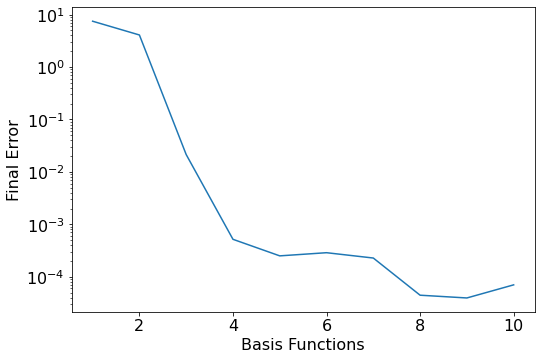

In [12]:
plt.figure(figsize=(8.3, 5.6))
plt.semilogy(range(1, 11), palais_errorsvs_num_basis)
plt.ylabel("Final Error", fontsize=16)
plt.xlabel("Basis Functions", fontsize=16)
plt.savefig(savepath + "error-vs-functions-palais.pdf", bbox_inches="tight")
plt.show()

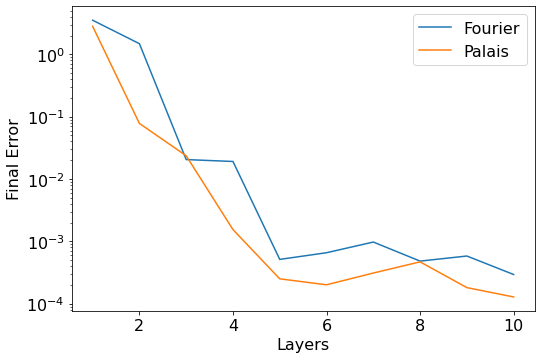

In [17]:
plt.figure(figsize=(8.3, 5.6))
plt.semilogy(range(1, 11), error_vs_num_layers, label="Fourier")
plt.semilogy(range(1, 11), palais_errorsvs_num_layers, label="Palais")
plt.ylabel("Final Error", fontsize=16)
plt.xlabel("Layers", fontsize=16)
plt.legend(fontsize=16)
plt.savefig(savepath + "error-vs-layers-both.pdf", bbox_inches="tight")
plt.show()

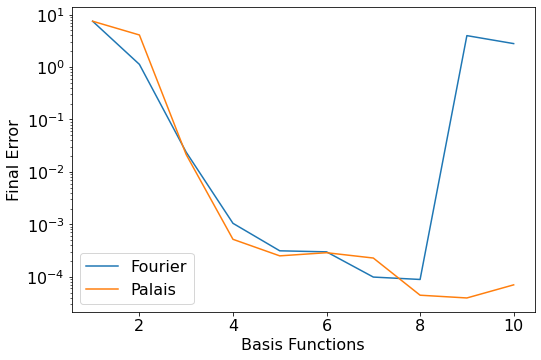

In [18]:
plt.figure(figsize=(8.3, 5.6))
plt.semilogy(range(1, 11), errors_vs_num_basis, label="Fourier")
plt.semilogy(range(1, 11), palais_errorsvs_num_basis, label="Palais")
plt.ylabel("Final Error", fontsize=16)
plt.xlabel("Basis Functions", fontsize=16)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(savepath + "error-vs-basis-both.pdf", bbox_inches="tight")
plt.show()